In [ ]:
#!/bin/bash
!kaggle datasets download pratik2901/multiclass-weather-dataset

Dataset URL: https://www.kaggle.com/datasets/pratik2901/multiclass-weather-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
 92% 84.0M/91.4M [00:00<00:00, 96.6MB/s]
100% 91.4M/91.4M [00:00<00:00, 97.5MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile('multiclass-weather-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
import os

dataset_dir = '/content/Multi-class Weather Dataset'  # Adjust path if needed
for class_name in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        print(f"{class_name}: {num_images} images")

Cloudy: 300 images
Shine: 253 images
Rain: 215 images
Sunrise: 357 images


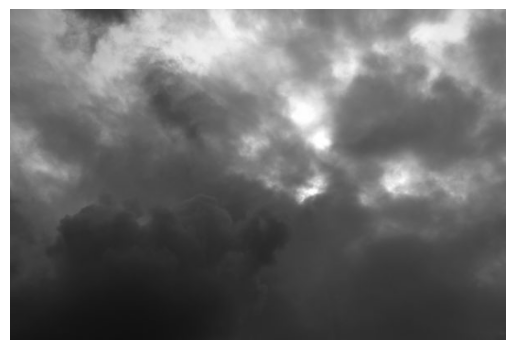

Image size: (600, 400)


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
img = "/content/Multi-class Weather Dataset/Cloudy/cloudy1.jpg" # Adjust filename
img = Image.open(img)
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()
print(f"Image size: {img.size}")

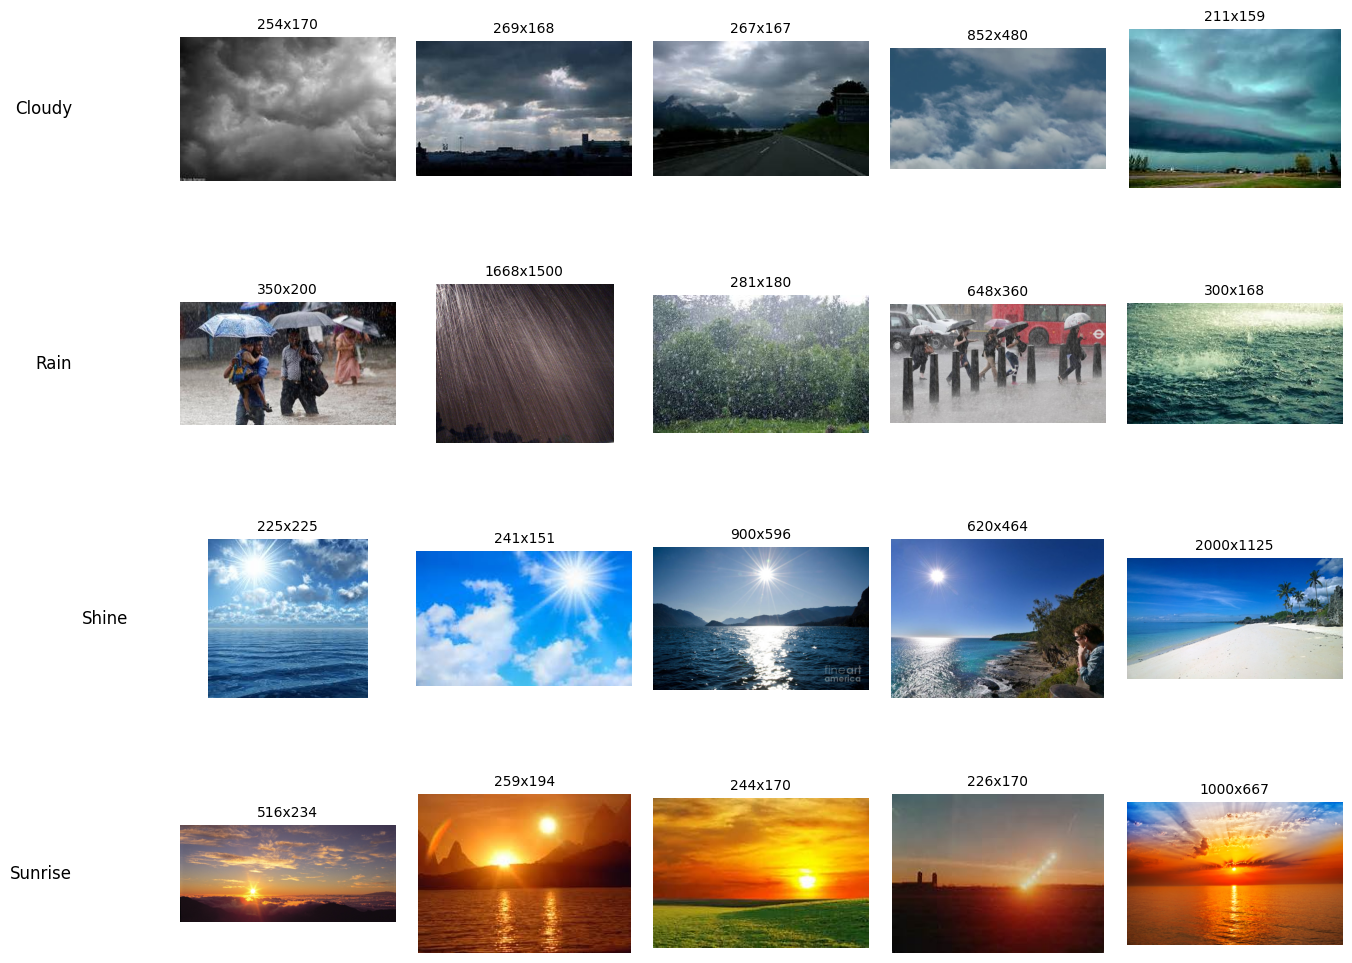

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# Base directory of the dataset
dataset_dir = "/content/Multi-class Weather Dataset"

# Class names based on your input
classes = ["Cloudy", "Rain", "Shine", "Sunrise"]

# Set up the plot: 4 rows (one per class), 5 columns (5 images per class)
fig, axes = plt.subplots(4, 5, figsize=(15, 12))  # Adjust figure size as needed
plt.subplots_adjust(hspace=0.6, wspace=0.1)  # Increase hspace for titles

# Loop through each class and display 5 images
for i, class_name in enumerate(classes):
    class_path = os.path.join(dataset_dir, class_name)
    # Get list of image files in the class folder (limit to 5)
    image_files = [f for f in os.listdir(class_path) if f.endswith(('.jpg', '.jpeg', '.png'))][:5]

    for j, image_file in enumerate(image_files):
        # Load the image
        img_path = os.path.join(class_path, image_file)
        img = Image.open(img_path)

        # Get image size
        img_size = f"{img.size[0]}x{img.size[1]}"  # width x height

        # Display the image in the corresponding subplot
        axes[i, j].imshow(img)
        axes[i, j].axis('off')  # Hide axes

        # Add image size as title above each image
        axes[i, j].set_title(img_size, fontsize=10)

        # Add class name to the leftmost column
        if j == 0:
            axes[i, j].text(-0.5, 0.5, class_name, transform=axes[i, j].transAxes,
                            fontsize=12, va='center', ha='right')  # Position class name to the left

# Show the plot
plt.show()

Processing Rain (215 images)...
Processing Shine (253 images)...
Processing Cloudy (300 images)...
Processing Sunrise (357 images)...
All images resized to 224x224 and saved in: /content/Multi-class Weather Resized Dataset 


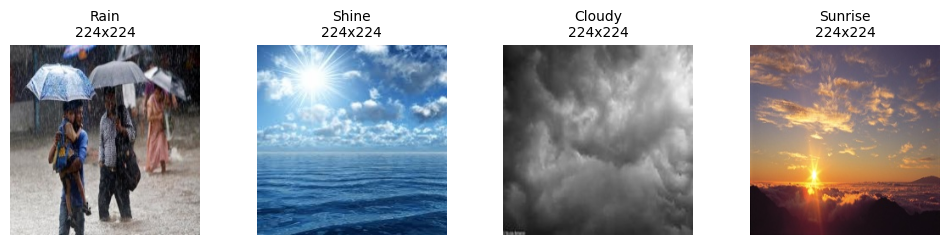

In [ ]:
import os
import cv2
from PIL import Image
import matplotlib.pyplot as plt

# Base directory of the dataset
input_dir = "/content/Multi-class Weather Dataset"
output_dir = "/content/Multi-class Weather Resized Dataset "

# Class names
classes = ["Rain", "Shine", "Cloudy", "Sunrise"]

# Create output directory if it doesn’t exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Loop through each class
for class_name in classes:
    input_class_path = os.path.join(input_dir, class_name)
    output_class_path = os.path.join(output_dir, class_name)

    # Create class folder in output directory
    if not os.path.exists(output_class_path):
        os.makedirs(output_class_path)

    # Get all image files in the class folder
    image_files = [f for f in os.listdir(input_class_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

    print(f"Processing {class_name} ({len(image_files)} images)...")

    # Resize and save each image
    for image_file in image_files:
        # Load image
        img_path = os.path.join(input_class_path, image_file)
        img = cv2.imread(img_path)  # OpenCV loads in BGR

        # Check if image loaded successfully
        if img is not None:
            # Resize to 224x224
            img_resized = cv2.resize(img, (224, 224), interpolation=cv2.INTER_LINEAR)

            # Save to output directory (keep original filename)
            output_path = os.path.join(output_class_path, image_file)
            cv2.imwrite(output_path, img_resized)
        else:
            print(f"Warning: Failed to load image at {img_path}. Skipping...")

print("All images resized to 224x224 and saved in:", output_dir)

# Verify by displaying one random image from each class
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
plt.subplots_adjust(wspace=0.3)

for i, class_name in enumerate(classes):
    class_path = os.path.join(output_dir, class_name)
    image_files = [f for f in os.listdir(class_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

    # Check if there are any images in the folder
    if image_files:
        random_image = image_files[0]  # Pick first one for simplicity
        img_path = os.path.join(class_path, random_image)
        img = cv2.imread(img_path)

        # Check if image loaded successfully
        if img is not None:
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for display

            axes[i].imshow(img_rgb)
            axes[i].axis('off')
            axes[i].set_title(f"{class_name}\n224x224", fontsize=10)
        else:
            print(f"Warning: Failed to load image at {img_path} for display.")
    else:
        print(f"Warning: No images found in {class_path} for display.")

plt.show()

(275, 183)


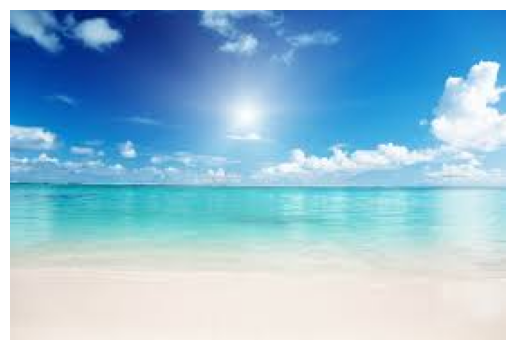

In [ ]:
from PIL import Image

img_path = "/content/Multi-class Weather Dataset/Shine/shine103.jpg"  # Store the path as a string
img = Image.open(img_path)
plt.imshow(img)
plt.axis("off")# Open the image using the path

# Now you can access the size
print(img.size)

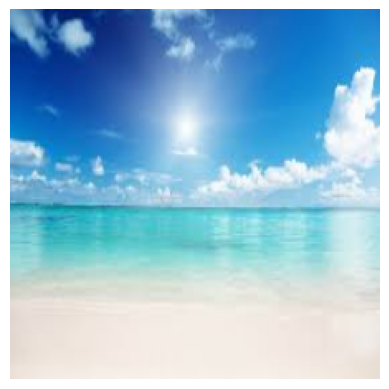

New size: (224, 224, 3)


In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load with OpenCV (BGR format)
img_cv = cv2.imread(img_path)
# Resize to 224x224
img_resized = cv2.resize(img_cv, (224, 224), interpolation=cv2.INTER_LINEAR)
# Convert BGR to RGB for display
img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()
print(f"New size: {img_rgb.shape}")

Pixel range: 0.0 to 1.0


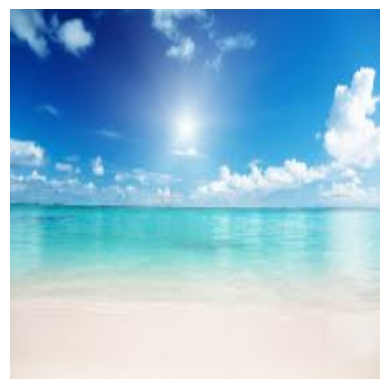

In [ ]:
# Normalize to [0, 1]
img_normalized = img_rgb / 255.0
print(f"Pixel range: {img_normalized.min()} to {img_normalized.max()}")
plt.imshow(img_normalized)
plt.axis('off')
plt.show()

In [ ]:
!pip install albumentations

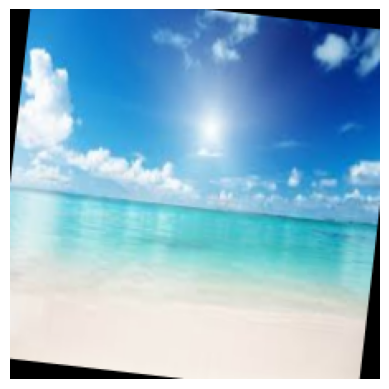

In [ ]:
 # Install in Colab if needed
import albumentations as A

# Define augmentation pipeline
transform = A.Compose([
    A.HorizontalFlip(p=0.8),  # 50% chance to flip
    A.Rotate(limit=30, p=0.5),  # Rotate up to 30 degrees
    A.RandomBrightnessContrast(p=0.5),  # Adjust brightness/contrast
])

# Apply to image (convert to numpy array first)
augmented = transform(image=img_rgb)
img_aug = augmented['image']
plt.imshow(img_aug)
plt.axis('off')
plt.show()

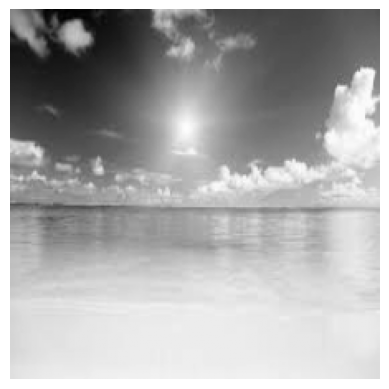

In [ ]:
# Convert to grayscale
img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.show()

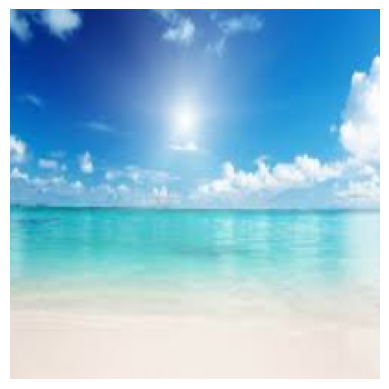

In [ ]:
# Crop to center 200x200 region
h, w = img_resized.shape[:2]
crop_size = 200
start_h, start_w = (h - crop_size) // 2, (w - crop_size) // 2
img_cropped = img_resized[start_h:start_h + crop_size, start_w:start_w + crop_size]
plt.imshow(cv2.cvtColor(img_cropped, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Resized All Dataset into the 224*224 Size

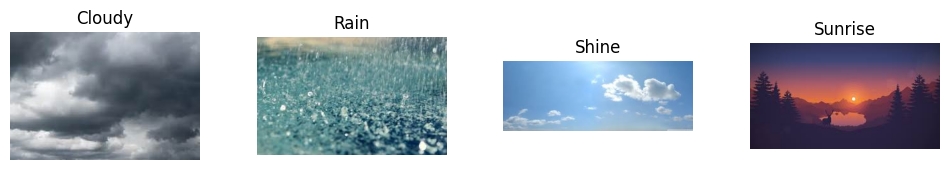

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import random

# Base directory of the dataset
dataset_dir = "/content/Multi-class Weather Dataset"

# Class names
classes = ["Cloudy", "Rain", "Shine", "Sunrise"]

# Set up the plot: 1 row, 4 columns (one image per class)
fig, axes = plt.subplots(1, 4, figsize=(12, 3))  # Adjust figure size as needed
plt.subplots_adjust(wspace=0.3)  # Space between images

# Loop through each class and display one random image
for i, class_name in enumerate(classes):
    class_path = os.path.join(dataset_dir, class_name)
    # Get list of image files in the class folder
    image_files = [f for f in os.listdir(class_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

    # Pick a random image
    random_image_file = random.choice(image_files)
    img_path = os.path.join(class_path, random_image_file)

    # Load and display the image
    img = Image.open(img_path)
    axes[i].imshow(img)
    axes[i].axis('off')  # Hide axes
    axes[i].set_title(class_name, fontsize=12)  # Add class name as title

# Show the plot
plt.show()

# Train Custom CNN model

Found 900 images belonging to 4 classes.
Found 223 images belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 239ms/step - accuracy: 0.4334 - loss: 1.6788 - val_accuracy: 0.7309 - val_loss: 0.5839
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.7996 - loss: 0.5323 - val_accuracy: 0.8386 - val_loss: 0.4191
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.8840 - loss: 0.3407 - val_accuracy: 0.7399 - val_loss: 0.7597
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.8885 - loss: 0.3002 - val_accuracy: 0.8161 - val_loss: 0.4318
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9319 - loss: 0.1877 - val_accuracy: 0.8251 - val_loss: 0.4217
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9124 - loss: 0.2719 - val_accuracy: 0.8430 - val_loss: 0.4903
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9517 - loss: 0.1430 - val_accuracy: 0.8475 - val_loss: 0.3072
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9711 - loss: 0.1014 - val_accuracy: 0.8700 - val_loss: 

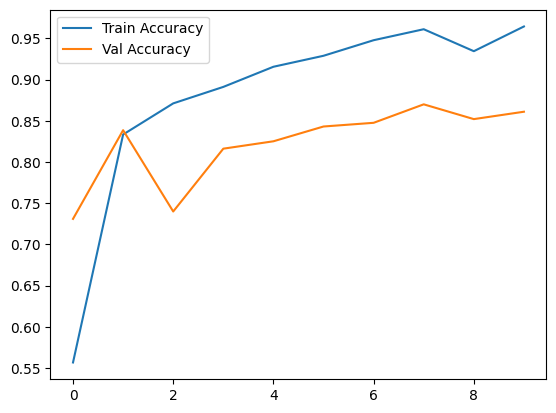

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths
data_dir = "/content/Multi-class Weather Resized Dataset "

# Data generator for loading images
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # Normalize and split 80/20
train_gen = datagen.flow_from_directory(
    data_dir, target_size=(224, 224), batch_size=32, class_mode='categorical', subset='training'
)
val_gen = datagen.flow_from_directory(
    data_dir, target_size=(224, 224), batch_size=32, class_mode='categorical', subset='validation'
)

# Build a simple CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')  # 4 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_gen, epochs=10, validation_data=val_gen)

# Plot accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


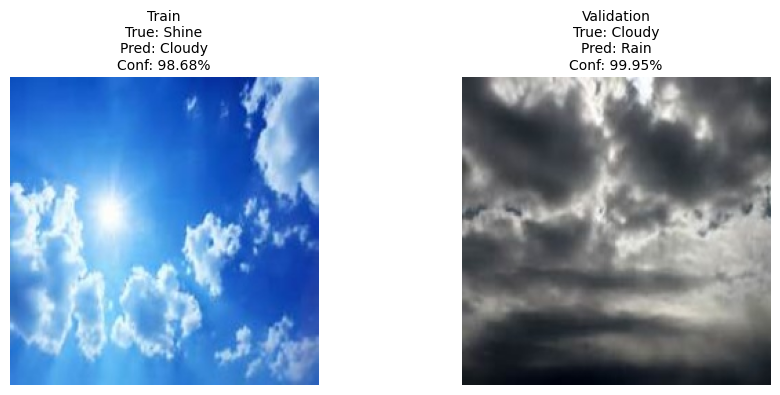

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import random
from tensorflow.keras.preprocessing.image import img_to_array

# Assuming 'model' is your trained CNN from earlier
# If not, load it: model = tf.keras.models.load_model('weather_cnn.h5')

# Base directory of your resized dataset
data_dir = "/content/Multi-class Weather Resized Dataset "

# Class names
classes = ["Rain", "Shine", "Cloudy", "Sunrise"]

# Total images per class from your dataset
class_counts = {"Rain": 215, "Shine": 253, "Cloudy": 300, "Sunrise": 357}

# Function to preprocess a single image
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))  # Already 224x224, but ensures consistency
    img = img_to_array(img) / 255.0    # Normalize to [0, 1]
    img = np.expand_dims(img, axis=0)   # Add batch dimension
    return img

# Function to get a random image from a specific subset (train or val)
def get_random_image(subset="train"):
    # Pick a random class
    class_name = random.choice(classes)
    class_path = os.path.join(data_dir, class_name)

    # Get all images in the class folder
    image_files = [f for f in os.listdir(class_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

    # Simulate the 80/20 split (training = 80%, validation = 20%)
    total_images = class_counts[class_name]
    train_size = int(0.8 * total_images)  # 80% for training

    if subset == "train":
        # Pick from the first 80% (training subset)
        random_image = random.choice(image_files[:train_size])
    else:  # validation
        # Pick from the last 20% (validation subset)
        random_image = random.choice(image_files[train_size:])

    return os.path.join(class_path, random_image), class_name

# Get one random image from training and one from validation
train_img_path, train_true_class = get_random_image("train")
val_img_path, val_true_class = get_random_image("val")

# Run inference on both
train_img = preprocess_image(train_img_path)
val_img = preprocess_image(val_img_path)

train_pred = model.predict(train_img)
val_pred = model.predict(val_img)

train_pred_class = classes[np.argmax(train_pred[0])]
train_confidence = np.max(train_pred[0]) * 100
val_pred_class = classes[np.argmax(val_pred[0])]
val_confidence = np.max(val_pred[0]) * 100

# Display results
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
plt.subplots_adjust(wspace=0.4)

# Training image
train_display = cv2.cvtColor(cv2.imread(train_img_path), cv2.COLOR_BGR2RGB)
axes[0].imshow(train_display)
axes[0].axis('off')
axes[0].set_title(f"Train\nTrue: {train_true_class}\nPred: {train_pred_class}\nConf: {train_confidence:.2f}%", fontsize=10)

# Validation image
val_display = cv2.cvtColor(cv2.imread(val_img_path), cv2.COLOR_BGR2RGB)
axes[1].imshow(val_display)
axes[1].axis('off')
axes[1].set_title(f"Validation\nTrue: {val_true_class}\nPred: {val_pred_class}\nConf: {val_confidence:.2f}%", fontsize=10)

plt.show()

Saving rainy.jpg to rainy (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


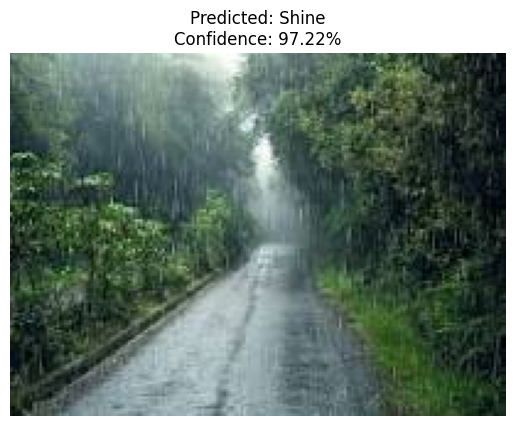

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array
from google.colab import files  # For uploading in Colab

# Assuming 'model' is your trained CNN
# If not, load it: model = tf.keras.models.load_model('weather_cnn.h5')

# Class names
classes = ["Rain", "Shine", "Cloudy", "Sunrise"]

# Function to preprocess a single image
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (224, 224))           # Resize to 224x224
    img = img_to_array(img) / 255.0             # Normalize to [0, 1]
    img = np.expand_dims(img, axis=0)           # Add batch dimension
    return img

# Option 1: Upload an image in Colab
uploaded = files.upload()  # Upload an image via Colab interface
image_path = list(uploaded.keys())[0]  # Get the uploaded file’s name

# Option 2: Use a specific path (uncomment and adjust if you have a path)
# image_path = "/content/Multi-class Weather Dataset Resized/Cloudy/cloudy1.jpg"

# Preprocess the image
img = preprocess_image(image_path)

# Run inference
prediction = model.predict(img)
pred_class = classes[np.argmax(prediction[0])]
confidence = np.max(prediction[0]) * 100

# Display the image and prediction
img_display = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
plt.imshow(img_display)
plt.axis('off')
plt.title(f"Predicted: {pred_class}\nConfidence: {confidence:.2f}%", fontsize=12)
plt.show()

In [ ]:
model.save("weather_classification_model.h5")

# Transfer Learning

Found 900 images belonging to 4 classes.
Found 223 images belonging to 4 classes.
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/29 ━━━━━━━━━━━━━━━━━━━━ 21s 416ms/step - accuracy: 0.6876 - loss: 0.7400 - val_accuracy: 0.8789 - val_loss: 0.3277
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.9654 - loss: 0.1183 - val_accuracy: 0.8744 - val_loss: 0.2465
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.9846 - loss: 0.0553 - val_accuracy: 0.9013 - val_loss: 0.2422
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9930 - loss: 0.0295 - val_accuracy: 0.9058 - val_loss: 0.2536
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9909 - loss: 0.0310 - val_accuracy: 0.8879 - val_loss: 0.3267
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9983 - loss: 0.0226 - val_accuracy: 0.8969 - val_loss: 0.2358
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 1.0000 - loss: 0.0101 - val_accuracy: 0.9058 - val_loss: 0.2428
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 1.0000 - loss: 0.0074 - val_accuracy: 0.8969 - val_loss: 

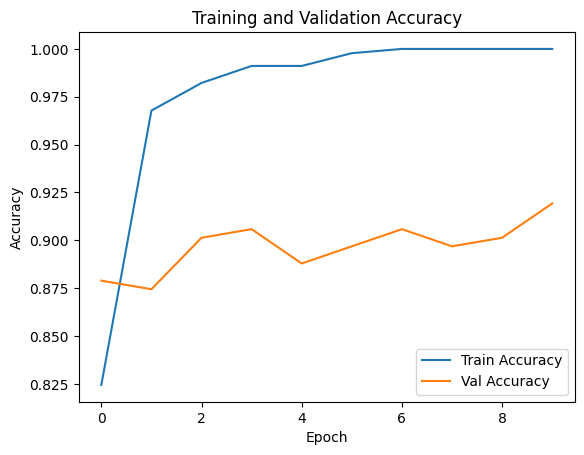

Model saved as 'weather_transfer_mobile.h5'


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Step 1 & 2: Load pre-trained MobileNetV2 without top layer
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Step 3: Freeze the base model
base_model.trainable = False

# Step 4: Add custom layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # Reduces spatial dimensions
    layers.Dense(128, activation='relu'),  # Optional dense layer for extra learning
    layers.Dense(4, activation='softmax')  # 4 classes: Rain, Shine, Cloudy, Sunrise
])

# Step 5: Prepare the data
data_dir = "/content/Multi-class Weather Resized Dataset "
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize to [0, 1]
    validation_split=0.2  # 80% train, 20% validation
)

train_gen = datagen.flow_from_directory(
    data_dir, target_size=(224, 224), batch_size=32, class_mode='categorical', subset='training'
)
val_gen = datagen.flow_from_directory(
    data_dir, target_size=(224, 224), batch_size=32, class_mode='categorical', subset='validation'
)

# Step 6: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 7: Train the model
history = model.fit(train_gen, epochs=10, validation_data=val_gen)

# Step 9: Evaluate and plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Save the model
model.save("weather_transfer_mobile.h5")
print("Model saved as 'weather_transfer_mobile.h5'")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


Saving sunrise.jpg to sunrise (2).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


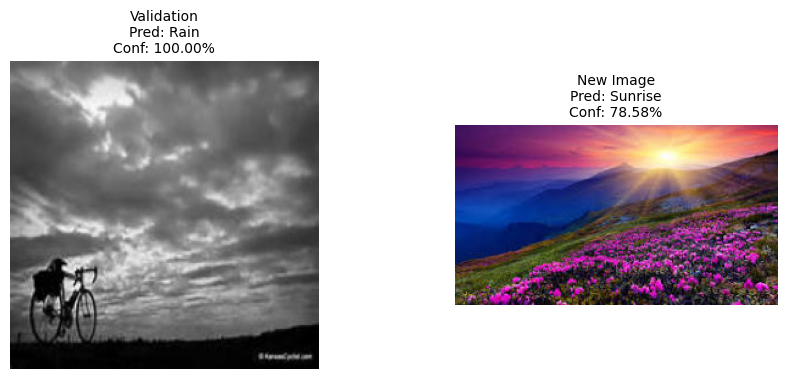

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import random
from tensorflow.keras.preprocessing.image import img_to_array
from google.colab import files

# Load your trained MobileNetV2 model
model = tf.keras.models.load_model("weather_transfer_mobile.h5")

# Class names
classes = ["Rain", "Shine", "Cloudy", "Sunrise"]

# Function to preprocess a single image
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    img = img_to_array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    return img

# 1. Test a random validation image
data_dir = "/content/Multi-class Weather Resized Dataset "
class_counts = {"Rain": 215, "Shine": 253, "Cloudy": 300, "Sunrise": 357}

# Pick a random validation image
class_name = random.choice(classes)
class_path = os.path.join(data_dir, class_name)
image_files = [f for f in os.listdir(class_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
train_size = int(0.8 * class_counts[class_name])  # 80% train
val_image = random.choice(image_files[train_size:])  # From last 20%
val_img_path = os.path.join(class_path, val_image)

val_img = preprocess_image(val_img_path)
val_pred = model.predict(val_img)
val_pred_class = classes[np.argmax(val_pred[0])]
val_confidence = np.max(val_pred[0]) * 100

# 2. Upload and test a new image
uploaded = files.upload()
new_img_path = list(uploaded.keys())[0]
new_img = preprocess_image(new_img_path)
new_pred = model.predict(new_img)
new_pred_class = classes[np.argmax(new_pred[0])]
new_confidence = np.max(new_pred[0]) * 100

# Display results
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
plt.subplots_adjust(wspace=0.4)

# Validation image
val_display = cv2.cvtColor(cv2.imread(val_img_path), cv2.COLOR_BGR2RGB)
axes[0].imshow(val_display)
axes[0].axis('off')
axes[0].set_title(f"Validation\nPred: {val_pred_class}\nConf: {val_confidence:.2f}%", fontsize=10)

# Uploaded image
new_display = cv2.cvtColor(cv2.imread(new_img_path), cv2.COLOR_BGR2RGB)
axes[1].imshow(new_display)
axes[1].axis('off')
axes[1].set_title(f"New Image\nPred: {new_pred_class}\nConf: {new_confidence:.2f}%", fontsize=10)

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


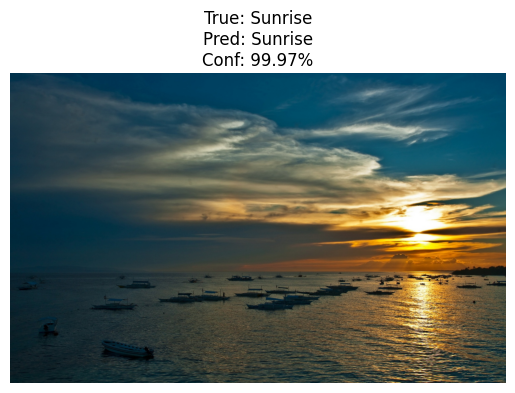

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import random
from tensorflow.keras.preprocessing.image import img_to_array

# Load your trained MobileNetV2 model
model = tf.keras.models.load_model("/content/weather_transfer_mobile.h5")

# Base directory of your resized dataset
data_dir = "/content/Multi-class Weather Resized Dataset "

# Class names and counts
classes = ["Rain", "Shine", "Cloudy", "Sunrise"]
class_counts = {"Rain": 215, "Shine": 253, "Cloudy": 300, "Sunrise": 357}

# Function to preprocess a single image
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))  # Already 224x224, but ensures consistency
    img = img_to_array(img) / 255.0    # Normalize to [0, 1]
    img = np.expand_dims(img, axis=0)   # Add batch dimension
    return img

# Function to get a random validation image
def get_random_validation_image():
    # Pick a random class
    class_name = random.choice(classes)
    class_path = os.path.join(data_dir, class_name)

    # Get all images in the class folder
    image_files = [f for f in os.listdir(class_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

    # Simulate 80/20 split: validation is last 20%
    train_size = int(0.8 * class_counts[class_name])  # 80% for training
    val_files = image_files[train_size:]  # Last 20% for validation

    # Pick a random validation image
    random_val_image = random.choice(val_files)
    return os.path.join(class_path, random_val_image), class_name

# Get a random validation image
val_img_path, true_class = get_random_validation_image()

# Preprocess and predict
val_img = preprocess_image(val_img_path)
prediction = model.predict(val_img)
pred_class = classes[np.argmax(prediction[0])]
confidence = np.max(prediction[0]) * 100

# Display the result
img_display = cv2.cvtColor(cv2.imread(val_img_path), cv2.COLOR_BGR2RGB)
plt.imshow(img_display)
plt.axis('off')
plt.title(f"True: {true_class}\nPred: {pred_class}\nConf: {confidence:.2f}%", fontsize=12)
plt.show()